### CNN Introduction

### 1. The convolution operation

The convolution operation enables CNNs to learn local patters over feature space by applying convolution operation.
The below figure for instance shows how the local paatterns learnt over the digit. 

<img src="fig/conv_operation.png" width=200 height=200 />

The key charasterics of  of the convolution operation is given below:

* it is translation invariant 
* it learns hierarchical patterns in an image. For instance, first layers learn basic image features like edges, corners adn so on. And the deeper layers learn more complex features. For instance, the below figure shows how to features are learnt over a given image. 

The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map. The feature map is called **filter**. 


Convolutions operate over 3D tensors, called **feature maps**, with two spatial axes **(height
and width)** as well as a **depth** axis (also called the channels axis).

Convolution is defined with two key parameters:
    1. size of filters, 
    2. depth of feature map.
    

For instance in Keras we define convolution layer as follow:

```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```

The below figure shows how the convolution operation works over input features by sliding window of filters.
<img src="fig/how_conv.gif" width=200 height=200 />

Note that the output width and heightis different from the input width and height.This depends on two important factors in convolution operation and which are:
* padding
* strides


#### 1.1 Padding and How it Works

Consider the following problemd given by the figure below. For Consider a $5 × 5$ feature map, here are only 9 tiles around which you can center a $3 × 3$ kernel(filter) window, forming a $3 × 3$ grid (see figure 5.5). That mean the output feature map will be $3 x 3$ by shrinking two tiles alongside borh rows and columns. 

<img src="fig/pad_before.png" width=500 height=500 />

However, what if we would like to have an output map with same spatial size as an input's spatial size?
Here, we apply padding to have same size output as the input size.

**Padding** consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. Now see the above figure with padding:
<img src="fig/pad_after.png" width=500 height=500 />


At the code level, we have **padding** keyword to configure for padding option. It has two options given below:
* "valid": means no padding 
* "same": means “pad in such a way as to have an output with the same width and height as the input.” 

The comparison can be seen on below figure clearly. 
<img src="fig/pad_same.png" width=300 height=300 />

#### 1.2 Stride and How it Works
 While sliding filters over feture maps, there is a distance between two successive windows of filter. This is a parameter and called **stride**. Consider below example,you can see the patches etracted by a 2× 2convolution with stride 2 over a 4× 4input (without padding) and with stride 1 (as default). 
 
 <img src="fig/stride_sample.png" width=300 height=300 />

Using stride 2 means the width and height of the feature map are downsampled by a factor of 2. This can be done also by **max-pooling** explained below. 

#### 1.3 Max Pooling and How it works

While applying convolutional layers, we often like to downsample the feature map. This can be achieved with max pooling operation which onsists of extracting windows from the input feature maps and outputting the max value of each channel. Max pooling is a crucial operation to keep hierarhical features and reduce number of parameters in convoutional layers. 

There is also **average pooling** to achieve downsampling task. However, given the fact that it’s more informative to look at the maximal presence of different features than at their average presence, the max pooling is prefered over average pooling. 
<img src="fig/max_pooling.png" width=500 height=500 />

An important property of pooling is that it makes feature maps **translation invariant**. This is actually an significant aspect of convolutional networks since it is not important to know where a particular feature of given image is. 

### 2. Typical Convolutional Layer Block

Typical convolutional layer is defined as follow:
* Convolutional stage: this is an affine tranformation
* Detector stage: this is an stage where the nonlineratiy introduced by activation functions explained below. 
* Pooling layer: this is used for downsampling. 
* Normalization(optional): this is used in case of applying featue ormalization inside a convolutionl network itself.

<img src="fig/conv_nets_layer.jpg" width=500 height=500 />

### 2.1 NonLinearity - Activation Functions

Activation functions are used to introduce nonlinearity to convolutional layers. There are many activation functions proposed in the literature for deep learning models. Some of the most used ones are illustrated below:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data to visualize
x = np.arange(-5, 5, 0.01)

In [3]:
# Plot helper function
def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='r', lw=3)

#### Sigmoid 
$$
f(x)={\frac {1}{1+e^{-x}}}
$$

$$
f'(x)=f(x)(1-f(x))
$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

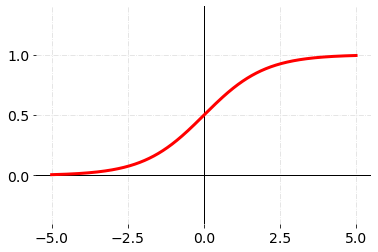

In [7]:
plot(sigmoid, yaxis=(-0.4, 1.4))

#### Hyperbolic Tangent

$$
f(x)={\frac {2}{1+e^{-2x}}}-1
$$

$$
f'(x)=1-f(x)^2
$$

In [8]:
def tanh(x):
    return 2 / (1 + np.exp(-2 * x)) -1

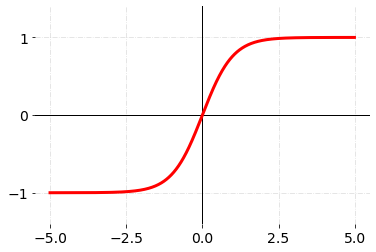

In [9]:
plot(tanh)

#### Rectified Linear Units, ReLU

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$


$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [10]:
relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])

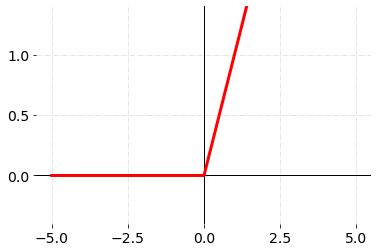

In [11]:
plot(relu, yaxis=(-0.4, 1.4))

#### Leaky Rectified Linear Units, Leaky ReLU

$$
f(x) = \left\{
        \begin{array}{lll}
            ax & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            a & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [12]:
leaky_relu = np.vectorize(lambda x: max(0.1 * x, x), otypes=[np.float])

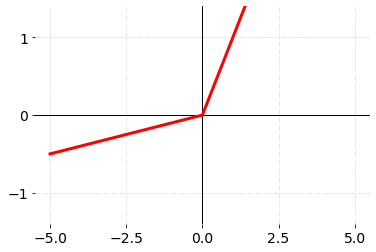

In [13]:
plot(leaky_relu)

####  Exponential Linear Units, ELU

$$
f(x) = \left\{
        \begin{array}{lll}
            a(e^x-1) & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

$$
f'(x) = \left\{
        \begin{array}{lll}
            f(x)+a & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

In [14]:
elu = np.vectorize(lambda x: x if x > 0 else 0.5 * (np.exp(x) - 1), otypes=[np.float])

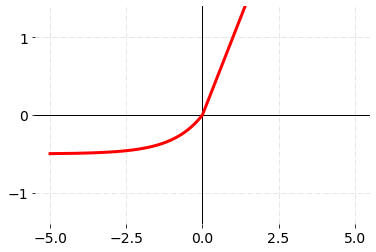

In [15]:
plot(elu)

#### Softmax


In [24]:
def softmax(inputs):
     return np.exp(inputs) / float(sum(np.exp(inputs)))

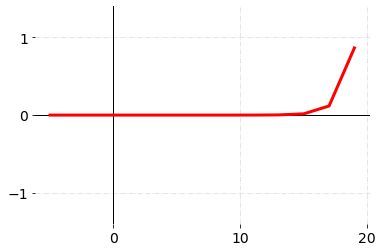

In [27]:
x=np.arange(-5.0,20.0,2)
plot(softmax)

In addition to above functions, there are also  recently introduced activation functions which are worth to mention here as below:
* Selu
* Swish
* Softplus



### 3. Advanced Convolution Operations
[TODO]
    * sparse connectivity
    * tiled convolutions
    * dense module
    * Depthwise-seperable conv layer
    * bathc normalization
#####  Inception Module
 
The module takes its name from the movie called Inception("We Need to Go Deeper"). It consists of parallel paths to extract features. Each path extracts features with different filters (what differs is the size of kernels). In essence, they are able to capture the details at different extents. It has used in a popular network won ImageNet competition, GoogleNet. Since then, it is a widely used CNN module in DL.

<img src="fig/inception.svg" width=500 height=500 />

###### Residual Module

The residual block has two 3×3 convolutional layers with the same number of output channels. Each convolutional layer is followed by a batch normalization layer and a ReLU activation function. Then, we skip these two convolution operations and add the input directly before the final ReLU activation function. This kind of design requires that the output of the two convolutional layers be of the same shape as the input, so that they can be added together. If we want to change the number of channels or the stride, we need to introduce an additional 1×1 convolutional layer to transform the input into the desired shape for the addition operation. " ResNet consists of residual modules and won ImageNet chanllenge.

Residual blocks allows the flow of memory (or information) from initial layers to last layers. Connections help in handling Vanishing gradient problem in very deep networks. In below Figure, the diagram on the left shows a standard CNN module, while the one on the right demonstrates a simple residual block

<img src="fig/residual-block.svg" width=500 height=500 />.

##### Dense Block 

A dense block is a group of layers connected to all their previous layers. A single layer is constructed by:

* Batch Normalization
* ReLU activation
* 3x3 Convolution

Below figure demonstrates the dense block connection in DenseNet architecture.
<img src="fig/densenet.png" width=500 height=300 />.


### 4.  Practical challenges and tips while working with cnns
* While training try to use Early Stopping to avoid overfitting.
* Learning Rate Finders and Learning Rate Schedulers are important.
* Use augmentations from moderate to heavy ones. 
* Remember cleaning data is more important than tunning models. You will gain more in that way.
* Try to find duplicate images and remove them.
* In case of imbalanced dataset, apply class-aware sampling. 
* Creating a good validation set is crucial.
* Ensemble learning is a powerful technique to learn/take advantage from/of multiple models.
* Augmentation scheduling is a way to make a model more robust. 
* Make a habit to monitor models carefully. One can use mlflow for that purpose. 
* Kernel regularizer and BatchNormalization should be applied. 
* While using Keras, try to use Sequence Module to create a data generator. 


